<a href="https://colab.research.google.com/github/HarshKumar67/Time-Series-Forecasting/blob/main/Time_Series_Forecasting_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/monthly_milk_production.csv', index_col='Date', parse_dates=True)

## this parse_date symbolize that the pandas does not treat date as a string date must be int.

In [4]:
df.index.freq='MS'
## indexing to set the frequency as monthly datset

In [5]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

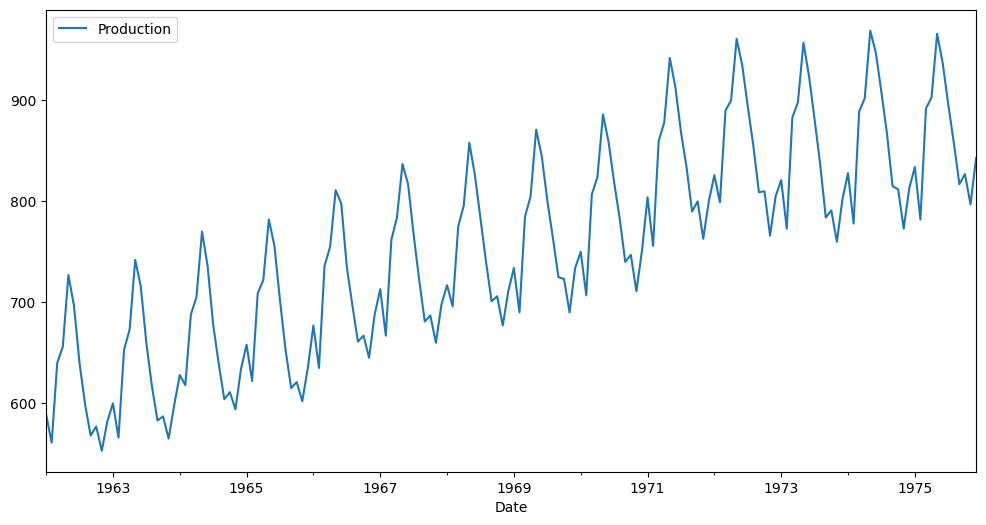

In [6]:
df.plot(figsize=(12,6))

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

## to fig out various types of plot for better visualization

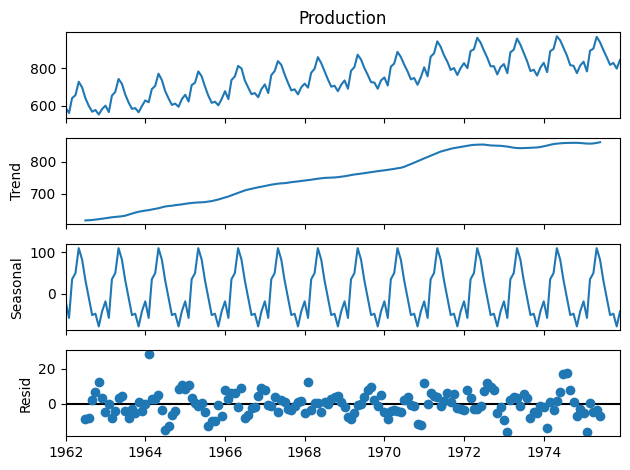

In [8]:
results = seasonal_decompose(df['Production'])
results.plot();

In [9]:
len(df)

168

In [10]:
train=df.iloc[:156]
test=df.iloc[156:]

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [12]:
df.head(), df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [13]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [14]:
scaled_train[:10], scaled_test[:10]

(array([[0.08653846],
        [0.01923077],
        [0.20913462],
        [0.24759615],
        [0.41826923],
        [0.34615385],
        [0.20913462],
        [0.11057692],
        [0.03605769],
        [0.05769231]]),
 array([[0.67548077],
        [0.55048077],
        [0.81490385],
        [0.84134615],
        [0.99278846],
        [0.92307692],
        [0.82451923],
        [0.73317308],
        [0.63461538],
        [0.65865385]]))

NOW THE MAIN PROCESS STARTS:
1. Importing time series generator and implementing it
     (ie. Given a sequence like `[1, 2, 3]`, the model predicts the next       value [4], then shifts the window to `[2, 3, 4]` to predict [5],          and continues iteratively.)

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [22]:
#deffining generaotr
n_inputs= 4
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_inputs, batch_size=1)

In [23]:
X,y= generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462 0.24759615]
Predict this y: 
 [[0.41826923]]


In [24]:
X.shape

(1, 4, 1)

In [26]:
# We do the same thing, but now instead of 4 we will do it for 12 months
n_inputs = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_inputs, batch_size=1)

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [28]:
#define model
model=Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_inputs, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
#fit model
model.fit(generator,epochs=50)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1003
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0235
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0224
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0125
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0085
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0097
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0069
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0055
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0039
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0071
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0045
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0032
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0028
Epoch 14/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0028
Epoch 15/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - lo

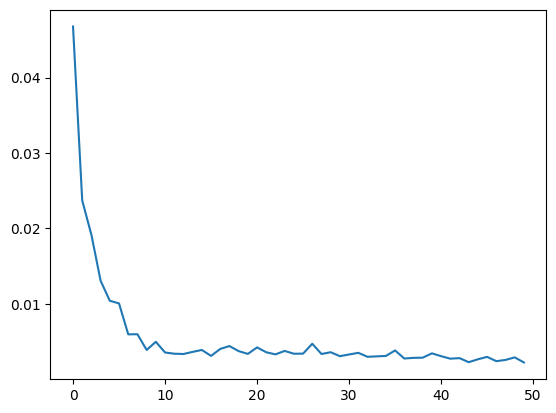

In [31]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [38]:
last_train_batch = scaled_train[-12:]

#The [-12:] slice means:
#👉 "Start from the 12th element from the end and go to the end."

In [39]:
last_train_batch = last_train_batch.reshape((1, n_inputs, n_features))

NOW  IT IS THE TIME OF PREDICTION WHERE: FIRST 12 INPUTS ARE TAKED FROM WHICH A SINGLE PREDICTION IS GIVEN.

NOW AGAIN THE INPUT FORMAT IS CHANGES AND INCLUDING THE PRIDICTED VALUE AGAIN A SET OF 12 INPUT ARE TAKEN

In [40]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[0.66618073]], dtype=float32)

In [41]:
scaled_test[0]

array([0.67548077])

How close the predicted and test value were. BUT  these value are normalized value so convert it into original value

In [43]:
test_predictions = []

first_eval_batch = scaled_train[-n_inputs:]
current_batch = first_eval_batch.reshape((1, n_inputs, n_features))

for i in range (len(test)):

  #get the prediction value for the first batch
  current_pred = model.predict(current_batch)[0]

  #store the prediction into an array
  test_predictions.append(current_pred)

  #use the prediction to update the batch and remove the first value
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [44]:
test_predictions

[array([0.66618073], dtype=float32),
 array([0.6688967], dtype=float32),
 array([0.86531115], dtype=float32),
 array([0.955251], dtype=float32),
 array([1.0568705], dtype=float32),
 array([1.0455635], dtype=float32),
 array([0.96311843], dtype=float32),
 array([0.8456712], dtype=float32),
 array([0.7192327], dtype=float32),
 array([0.65974367], dtype=float32),
 array([0.604486], dtype=float32),
 array([0.63740337], dtype=float32)]

CONVERT THEM INTO GENERALIZE WAY :
Inverese the scalar operation

In [45]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [46]:
true_predictions = scaler.inverse_transform(test_predictions)

In [47]:
test['Predictions'] = true_predictions

<ipython-input-47-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Date'>

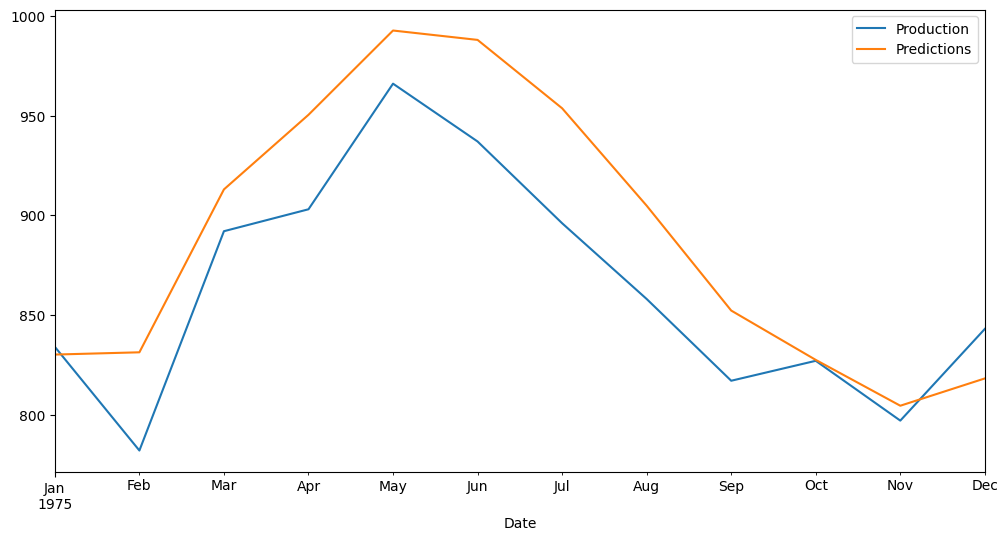

In [48]:
test.plot(figsize=(12,6))

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'], test['Predictions']))
print(rmse)

36.35499482872921
